In [1]:
2+2

4

In [2]:
import numpy as np
from xarray import DataArray
import networkx as nx
import ome_zarr_models as ozm
import xarray


In [3]:
"""Example: Create a sequence transformation mapping x, y -> a, b"""

from ome_zarr_models._v06.coordinate_transforms import (
    Axis,
    CoordinateSystem,
    Scale,
    Translation,
    Sequence,
)

# Define input coordinate system (x, y)
input_cs = CoordinateSystem(
    name="xy_space",
    axes=(
        Axis(name="x", type="space", unit="micrometer"),
        Axis(name="y", type="space", unit="micrometer"),
    ),
)

# Define output coordinate system (a, b)
output_cs = CoordinateSystem(
    name="ab_space",
    axes=(
        Axis(name="a", type="space", unit="micrometer"),
        Axis(name="b", type="space", unit="micrometer"),
    ),
)

scale_transform = Scale(
    scale=(2.0, 3.0),
)

translation_transform = Translation(
    translation=(10.0, 20.0),
)

sequence_transform = Sequence(
    input="xy_space",
    output="ab_space",
    transformations=(scale_transform, translation_transform),
)

# Print the sequence
print("Sequence transformation:")
print(sequence_transform.model_dump_json(indent=2))


# Get inverse transformation
inverse_sequence = sequence_transform.get_inverse()
print("\nInverse sequence:")
print(f"  Input: {inverse_sequence.input}")
print(f"  Output: {inverse_sequence.output}")
print(f"  Transforms: {[t.type for t in inverse_sequence.transformations]}")



Sequence transformation:
{
  "type": "sequence",
  "input": "xy_space",
  "output": "ab_space",
  "name": null,
  "transformations": [
    {
      "type": "scale",
      "input": null,
      "output": null,
      "name": null,
      "scale": [
        2.0,
        3.0
      ],
      "path": null
    },
    {
      "type": "translation",
      "input": null,
      "output": null,
      "name": null,
      "translation": [
        10.0,
        20.0
      ],
      "path": null
    }
  ]
}

Inverse sequence:
  Input: ab_space
  Output: xy_space
  Transforms: ['translation', 'scale']


In [ ]:
sequence_transform.transformations

In [ ]:
def validata_point_shape(point: np.ndarray, transformation_sequence: ozm._v06.coordinate_transforms.Sequence):
    for transformation in transformation_sequence.transformations:
        assert len(point) == transformation.ndim, "Point ndim doesn't match transformation ndim"


def transform_with_sequence(data: np.ndarray, axes: list[str], transformation_sequence: ozm._v06.coordinate_transforms.Sequence, output_axes: list[str]) -> DataArray:
    coordinate_rows = [np.arange(len(x)) for x in range(data.shape[0])]
    validata_point_shape(data_points[0], transformation_sequence)
    transformed_points = []
    for point in data_points:
        transformed_points.append(np.array(transformation_sequence.transform_point(point)))
    transformed_points = np.array(transformed_points)
        
    # return transformed_points
    return xarray.DataArray(data, coords=dict(x=transformed_points[:, 0], y=transformed_points[:, 1]), dims=output_axes)

In [ ]:
data = np.ones((200, 200, 3), dtype=np.uint8)

In [ ]:
data

In [ ]:
data_points = [(x, y) for x in range(data.shape[0]) for y in range(data.shape[1])]

In [ ]:
data_points[0]

In [ ]:
res = transform_with_sequence(data, ['x', 'y', 'c'], sequence_transform, ['x', 'c', 'y'])

In [ ]:
data_points = list(zip(np.arange(data.shape[0]), np.arange(data.shape[1])))

In [ ]:
data_points

In [ ]:
data_points = [(x, y) for x in range(data.shape[0]) for y in range(data.shape[1])]
# data_points = list(zip(np.arange(data.shape[0]), np.arange(data.shape[1])))

validata_point_shape(data_points[0], sequence_transform)
transformed_points = []
for point in data_points:
    transformed_points.append(np.array(sequence_transform.transform_point(point)))
transformed_points = np.array(transformed_points)

In [ ]:
axes = ['x', 'y', 'c']

In [ ]:
data.shape

In [ ]:
transformed_points.shape

In [ ]:
transformed_points[:, 0]

In [ ]:
np.unique(transformed_points[:, 0])

In [ ]:
np.unique(transformed_points[:, 0])

In [ ]:
transformed_points[:, 0]

In [ ]:
xarray.DataArray(data, 
                 coords=[(["x", "y"], transformed_points)], 
                 dims=["x", "y", "c"])

In [ ]:
def validata_point_shape(point: np.ndarray, transformation_sequence: ozm._v06.coordinate_transforms.Sequence):
    for transformation in transformation_sequence.transformations:
        assert len(point) == transformation.ndim, "Point ndim doesn't match transformation ndim"


def transform_with_sequence(data: np.ndarray, axes: list[str], transformation_sequence: ozm._v06.coordinate_transforms.Sequence, output_axes: list[str]) -> DataArray:
    data_points = list(zip(np.arange(data.shape[0]), np.arange(data.shape[1])))
    validata_point_shape(data_points[0], transformation_sequence)
    transformed_points = []
    for point in data_points:
        transformed_points.append(np.array(transformation_sequence.transform_point(point)))
    transformed_points = np.array(transformed_points)

    return xarray.DataArray(data, 
                 coords=dict(x=transformed_points[:, 0], 
                             y=transformed_points[:, 1]), 
                 dims=output_axes)

In [ ]:
transform_with_sequence_2

In [ ]:
transform_with_sequence(data, ["x", "y", "c"], sequence_transform, ["y", "x", "c"])

In [ ]:
import numpy as np
import xarray as xr

H, W, C = data.shape

# Create full coordinate grid
yy, xx = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
points = np.stack([xx, yy], axis=-1).reshape(-1, 2)  # (H*W, 2)


In [ ]:
transformed_points = np.array([sequence_transform.transform_point(p) for p in points])
# transformed_points shape: (H*W, 2)

In [ ]:
transformed_points.shape

In [ ]:
x_prime = transformed_points[:, 0].reshape(H, W)
y_prime = transformed_points[:, 1].reshape(H, W)

In [ ]:
x_prime.shape

In [ ]:
da = xr.DataArray(
    data,
    dims=("y", "x", "c"),
    coords={
        "x_prime": (("y", "x"), x_prime),
        "y_prime": (("y", "x"), y_prime),
    },
)


In [ ]:
da

In [ ]:
da[12:14, 20:30]

In [ ]:
def validata_point_shape(point: np.ndarray, transformation_sequence: ozm._v06.coordinate_transforms.Sequence):
    for transformation in transformation_sequence.transformations:
        assert len(point) == transformation.ndim, "Point ndim doesn't match transformation ndim"

def transform_with_sequence(data: np.ndarray, transformation_sequence: ozm._v06.coordinate_transforms.Sequence, 
                            output_axes: list[str]) -> DataArray:
    # locate (inside the graph) the coordinate_system classes from the coordinate_system names
    # first validate the input data wrt to axes and input_coordinate_system
        # 1. check that the data shape is (n x len(axes))
        # 2. check that the axes are the same (and in the same order) of the axes of the input_coordinate_system
    # traverse the graph to find the transformation -> Transform class
    # apply the transformations to the data (code to get inspired from https://github.com/scverse/spatialdata/blob/6652a03b1d66c8902a8f7a159176c51d8c9f823b/src/spatialdata/transformations/operations.py#L212)
    # tranform the data
        # return the transformed data as tuple (numpy array, output axes from the output coordinate systme)
    
    H, W, C = data.shape
    yy, xx = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
    points = np.stack([xx, yy], axis=-1).reshape(-1, 2)

    validata_point_shape(points[0], transformation_sequence)

    transformed_points = np.array([transformation_sequence.transform_point(p) for p in points])
    x_prime = transformed_points[:, 0].reshape(H, W)
    y_prime = transformed_points[:, 1].reshape(H, W)

    return xarray.DataArray(data, 
                            coords={
                                "x_prime": (("y", "x"), x_prime),
                                "y_prime": (("y", "x"), y_prime),
                            },
                            dims=output_axes)

In [ ]:
transform_with_sequence(data, sequence_transform, ["y", "x", "c"])

In [150]:
from pathlib import Path

import zarr

from ome_zarr_models._v06.collection import Collection
from ome_zarr_models._v06.image import Image

/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/axis_dependent/byDimension.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/axis_dependent/mapAxis.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic/identity.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic/scale.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic/scale_multiscale.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic/sequenceScaleTranslation.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic/sequenceScaleTranslation_multiscale.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/2d/basic_binary/scaleParams.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transf

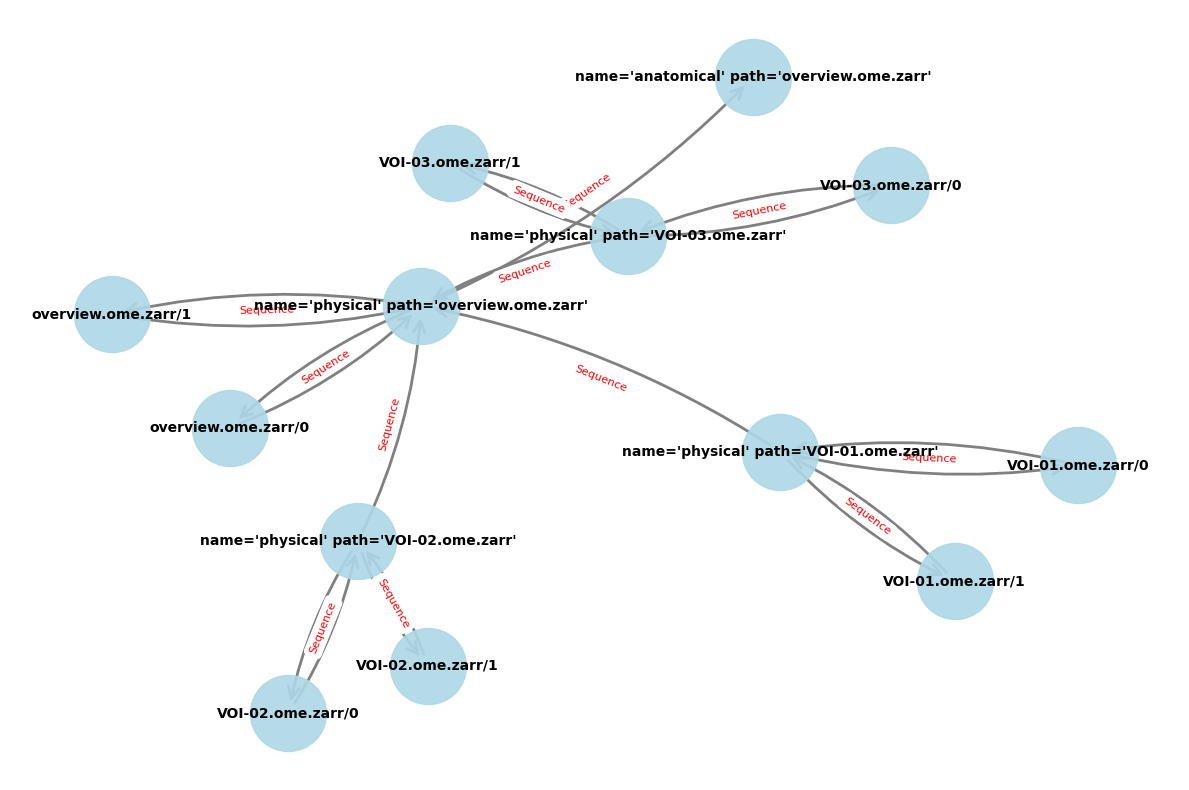

/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/user_stories/image_registration_3d.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/user_stories/lens_correction.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/user_stories/stitched_tiles_2d.zarr
/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples/user_stories/stitched_tiles_3d.zarr


In [151]:
EXAMPLE_PATH = (
    Path("/home/sysbio/ngff-transformations/data/ngff-rfc5-coordinate-transformation-examples")
)


def get_all_zarrs(directory: Path) -> list[Path]:
    """
    Get all Zarr sub-directories.
    """
    zarrs: list[Path] = []
    for f in directory.glob("*"):
        if f.is_dir():
            if f.suffix == ".zarr":
                # Found a Zarr group
                zarrs.append(f)
            else:
                # Recurse
                zarrs += get_all_zarrs(f)

    return sorted(zarrs)


for zarr_path in get_all_zarrs(EXAMPLE_PATH):
    print(zarr_path)
    relative_path = zarr_path.relative_to(EXAMPLE_PATH)

    if 'organ' not in str(relative_path):
        continue

    group: Collection | Image
    try:
        if relative_path.parts[0] == "user_stories":
            print(f'qwe {zarr_path}')
            group = Collection.from_zarr(zarr.open_group(zarr_path, mode="r"))
        else:
            group = Image.from_zarr(zarr.open_group(zarr_path, mode="r"))
    except Exception as e:
        # raise e
        # print(str(e))
        # continue
        print(f"😢 Failed to load group at {zarr_path.relative_to(EXAMPLE_PATH)}")
        continue

    print(f"📈 Rendering transform graph for {zarr_path.relative_to(EXAMPLE_PATH)}")
    graph = group.transform_graph()

    from ngff_transformations.graph import transform_graph_to_networkx, draw_graph

    nx_graph = transform_graph_to_networkx(graph)
    print(nx_graph)
    draw_graph(nx_graph)

    # graphviz_graph = graph.to_graphviz()
    # from PIL import Image as PILImage
    # import io
    #
    # png_bytes = graphviz_graph.pipe(format="png")
    #
    # PILImage.open(io.BytesIO(png_bytes)).show()  # uses default image viewer

    pass





In [22]:
type(list(nx_graph.nodes())[0])

ome_zarr_models._v06.coordinate_transforms.CoordinateSystemIdentifier

In [132]:
from ome_zarr_models._v06.coordinate_transforms import CoordinateSystemIdentifier

def get_node(path: str | None = None, name: str | None = None) -> str | CoordinateSystemIdentifier:
    if path is None and name is None:
        raise ValueError("Both path and name of the coordinate system cannot be None")
    if path is None:
        return name
    if name is None:
        return path
    return CoordinateSystemIdentifier(path=path, name=name)

In [138]:
def find_walks_in_graph(graph, src_path, src_name, tgt_path, tgt_name):
    src_node = get_node(src_path, src_name)
    tgt_node = get_node(tgt_path, tgt_name)

    graph_walk = list(nx.all_shortest_paths(graph, src_node, tgt_node))[0]

    print(graph_walk)
    transformation_sequence = []
    for i in range(len(graph_walk) - 1):
        transformation_sequence.append(graph.get_edge_data(graph_walk[i], graph_walk[i + 1])['transformation'])

    transformation_sequence = Sequence(
        input=graph_walk[0], 
        output=graph_walk[-1], 
        transformations=transformation_sequence
    )
    return transformation_sequence, (graph_walk[0], graph_walk[-1])


def transform_with_sequence3D(data: np.ndarray, axes: list[str], transformation_sequence: ozm._v06.coordinate_transforms.Sequence, 
                            output_axes: list[str]) -> DataArray:
    # locate (inside the graph) the coordinate_system classes from the coordinate_system names
    # first validate the input data wrt to axes and input_coordinate_system
        # 1. check that the data shape is (n x len(axes))
        # 2. check that the axes are the same (and in the same order) of the axes of the input_coordinate_system
    # traverse the graph to find the transformation -> Transform class
    # apply the transformations to the data (code to get inspired from https://github.com/scverse/spatialdata/blob/6652a03b1d66c8902a8f7a159176c51d8c9f823b/src/spatialdata/transformations/operations.py#L212)
    # tranform the data
        # return the transformed data as tuple (numpy array, output axes from the output coordinate systme)
    
    Y, X, Z, C = data.shape
    yy, xx, zz = np.meshgrid(np.arange(Y), np.arange(X), np.arange(Z), indexing='ij')
    points = np.stack([xx, yy, zz], axis=-1).reshape(-1, 3)

    # validata_point_shape(points[0], transformation_sequence)

    transformed_points = np.array([transformation_sequence.transform_point(p) for p in points])
    x_prime = transformed_points[:, 0].reshape(Y, X, Z)
    y_prime = transformed_points[:, 1].reshape(Y, X, Z)
    z_prime = transformed_points[:, 2].reshape(Y, X, Z)

    return xarray.DataArray(data, 
                            coords={
                                "x_prime": (("y", "x", "z"), x_prime),
                                "y_prime": (("y", "x", "z"), y_prime),
                                "z_prime": (("y", "x", "z"), z_prime)
                            },
                            dims=output_axes)

def validata_point_shape(point: np.ndarray, transformation_sequence: ozm._v06.coordinate_transforms.Sequence):
    for transformation in transformation_sequence.transformations:
        assert len(point) == transformation.ndim, "Point ndim doesn't match transformation ndim"

In [140]:
transformation_path, (src_coord_system, tgt_coord_system) = find_walks_in_graph(nx_graph, 'VOI-03.ome.zarr', 'physical', None, 'VOI-03.ome.zarr/1')

[CoordinateSystemIdentifier(name='physical', path='VOI-03.ome.zarr'), 'VOI-03.ome.zarr/1']


In [141]:
data = np.ones((10, 20, 30, 3), dtype=np.uint8)

In [142]:
transformed_data = transform_with_sequence3D(data, ['y', 'x', 'z', 'c'], paths[0], ['y', 'x', 'z', 'c'])

In [143]:
transformed_data

<xarray.DataArray (y: 10, x: 20, z: 30, c: 3)> Size: 18kB
array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
...
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]]], shape=(10, 20, 30, 3), dtype=uint8)
Coordinates:
    x_prime  (y, x, z) float64 48kB -0.5 -0.5 -0.5 -0.5 ... 1.73 1.73 1.73 1.73
    y_prime  (y, x, z) float64 48kB -0.5 -0.5 -0.5 -0.5 ... 0.5563 0.5563 0.5563
    z_prime  (y, x, z) float64 48kB -0.5 -0.3826 -0.2653 ... 2.669 2.786 2.904
Dimensions without coordinates: y, x, z, c

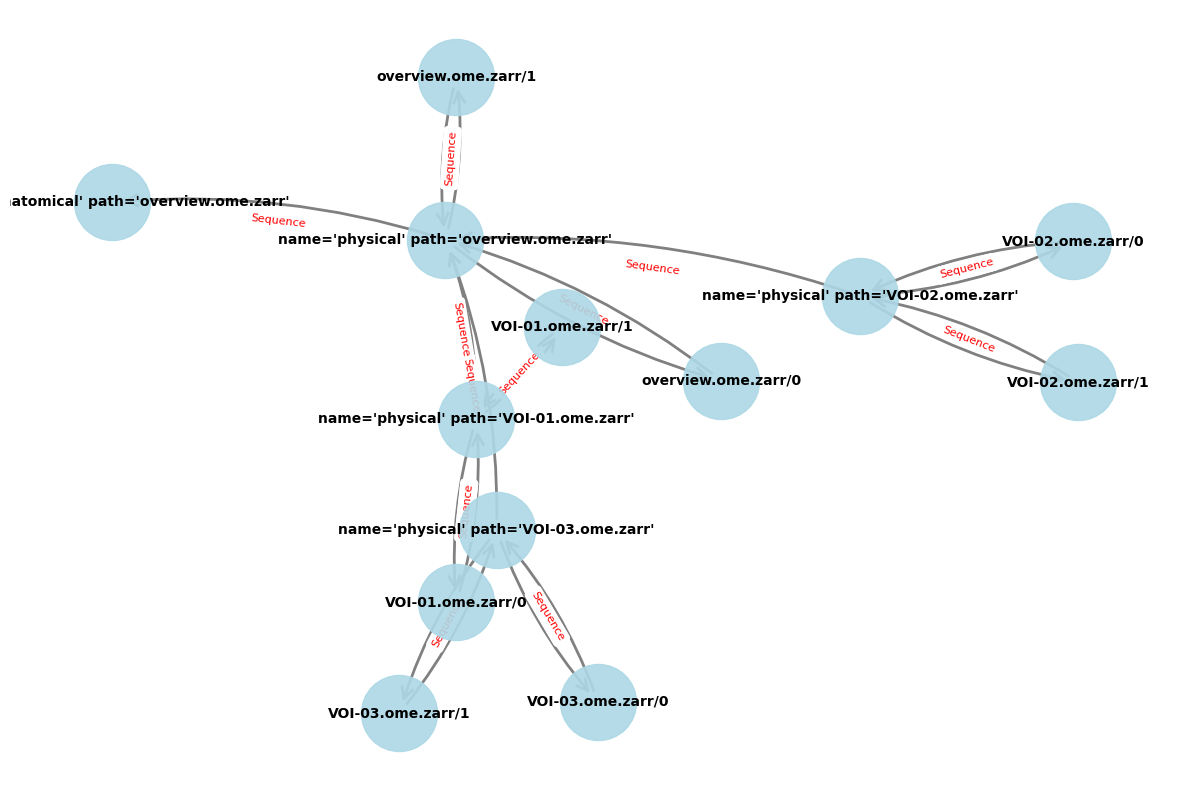

In [28]:
draw_graph(nx_graph)

In [26]:
nx_graph.nodes()

NodeView((CoordinateSystemIdentifier(name='physical', path='VOI-03.ome.zarr'), CoordinateSystemIdentifier(name='physical', path='overview.ome.zarr'), CoordinateSystemIdentifier(name='anatomical', path='overview.ome.zarr'), CoordinateSystemIdentifier(name='physical', path='VOI-02.ome.zarr'), CoordinateSystemIdentifier(name='physical', path='VOI-01.ome.zarr'), 'VOI-03.ome.zarr/0', 'VOI-03.ome.zarr/1', 'overview.ome.zarr/0', 'overview.ome.zarr/1', 'VOI-02.ome.zarr/0', 'VOI-02.ome.zarr/1', 'VOI-01.ome.zarr/0', 'VOI-01.ome.zarr/1'))

In [ ]:
get_node('')

In [ ]:
def find_walk_in_graph(..., src_path, src_name, tgt_path, tgt_name)

In [16]:
for zarr_path in get_all_zarrs(EXAMPLE_PATH):
    relative_path = zarr_path.relative_to(EXAMPLE_PATH)

    if 'organ' not in str(relative_path):
        continue

    group: Collection | Image
    try:
        if relative_path.parts[0] == "user_stories":
            group = Collection.from_zarr(zarr.open_group(zarr_path, mode="r"))
        else:
            group = Image.from_zarr(zarr.open_group(zarr_path, mode="r"))
    except Exception as e:
        # raise e
        # print(str(e))
        # continue
        print(f"😢 Failed to load group at {zarr_path.relative_to(EXAMPLE_PATH)}")
        continue

    print(f"📈 Rendering transform graph for {zarr_path.relative_to(EXAMPLE_PATH)}")
    graph = group.transform_graph()

    from ngff_transformations.graph import transform_graph_to_networkx, draw_graph

    nx_graph = transform_graph_to_networkx(graph)

📈 Rendering transform graph for user_stories/human_organ_atlas.zarr
